# Contructora e Inversiones AR-CO S.A
Este proyecto se basa en una constructora que obtiene su capital de las inversiones realizadas a las diferentes criptomonedas existentes mediante un programa que permite predecir el comportamiento de las cripto en determinados espacios de tiempo

In [1]:
# Importamos las librerias necesarias
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from datetime import datetime, timedelta

In [2]:
# Lista de las criptos
cryptos = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'LTC-USD', 'BCH-USD', 'ADA-USD']
        #  Bitcoinb  , Ethereum,   XRP    , Litecoin , Bitcoins cash, Cardano

In [3]:
# Obtenemos el dato actual
end_date = datetime.now().strftime("%Y-%m-%d")

In [4]:
# Calculamos la fecha inicial para que siempre sean 4 años atras a partir de la fecha final
start_date = (datetime.now() - timedelta(days=4*365)).strftime("%Y-%m-%d")

In [5]:
# Descargamos la informacion y la guardamos en una variable
data = yf.download(cryptos, start=start_date, end=end_date)["Adj Close"]
# Nota: Adj Close representa al valor de cierre ajustado la cual es una medida del rendimiento a largo plazo de un activo

c:\Users\Jorge HN\Desktop\Proyectos reales\Proyecto No Country DATA\s13-25-n-data-bi\env\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\Jorge HN\Desktop\Proyectos reales\Proyecto No Country DATA\s13-25-n-data-bi\env\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
c:\Users\Jorge HN\Desktop\Proyectos reales\Proyecto No Country DATA\s13-25-n-data-bi\env\Lib\site-packages\yfinance\utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h'

In [6]:
data

Ticker,ADA-USD,BCH-USD,BTC-USD,ETH-USD,LTC-USD,XRP-USD
Date,,,,,,
2020-02-22,0.058336,373.833130,9663.181641,262.331726,75.133080,0.275901
2020-02-23,0.061510,401.635529,9924.515625,273.754150,79.536652,0.282711
2020-02-24,0.058960,377.578583,9650.174805,265.216431,75.535622,0.270627
2020-02-25,0.056364,353.977448,9341.705078,247.817596,71.180244,0.253412
2020-02-26,0.049453,316.644135,8820.522461,225.680267,61.014309,0.230851
...,...,...,...,...,...,...
2024-02-16,0.598872,274.819977,52160.203125,2803.691406,70.617165,0.564960
2024-02-17,0.608346,267.419952,51662.996094,2786.672607,69.989624,0.549886
2024-02-18,0.618734,270.416443,52122.546875,2878.998047,70.730247,0.556903


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1460 entries, 2020-02-22 to 2024-02-20
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ADA-USD  1460 non-null   float64
 1   BCH-USD  1460 non-null   float64
 2   BTC-USD  1460 non-null   float64
 3   ETH-USD  1460 non-null   float64
 4   LTC-USD  1460 non-null   float64
 5   XRP-USD  1460 non-null   float64
dtypes: float64(6)
memory usage: 79.8 KB


In [8]:
# Miramos si hay datos nulos
data.isnull().sum()

Ticker
ADA-USD    0
BCH-USD    0
BTC-USD    0
ETH-USD    0
LTC-USD    0
XRP-USD    0
dtype: int64

In [9]:
data = data.fillna(data.median())

In [10]:
data.isnull().sum()

Ticker
ADA-USD    0
BCH-USD    0
BTC-USD    0
ETH-USD    0
LTC-USD    0
XRP-USD    0
dtype: int64

In [11]:
# Hallamos los rendimientos diarios
returns = data.pct_change().dropna()
returns

Ticker,ADA-USD,BCH-USD,BTC-USD,ETH-USD,LTC-USD,XRP-USD
Date,,,,,,
2020-02-23,0.054409,0.074371,0.027044,0.043542,0.058610,0.024683
2020-02-24,-0.041457,-0.059897,-0.027643,-0.031188,-0.050304,-0.042743
2020-02-25,-0.044030,-0.062507,-0.031965,-0.065602,-0.057660,-0.063611
2020-02-26,-0.122614,-0.105468,-0.055791,-0.089329,-0.142820,-0.089029
2020-02-27,0.004691,0.020975,-0.004085,0.004755,0.008090,0.027139
...,...,...,...,...,...,...
2024-02-16,-0.015601,0.015348,0.004268,-0.007325,0.011541,0.003918
2024-02-17,0.015820,-0.026927,-0.009532,-0.006070,-0.008887,-0.026682
2024-02-18,0.017076,0.011205,0.008895,0.033131,0.010582,0.012761


## Graficas

### Grafica de precios historicos

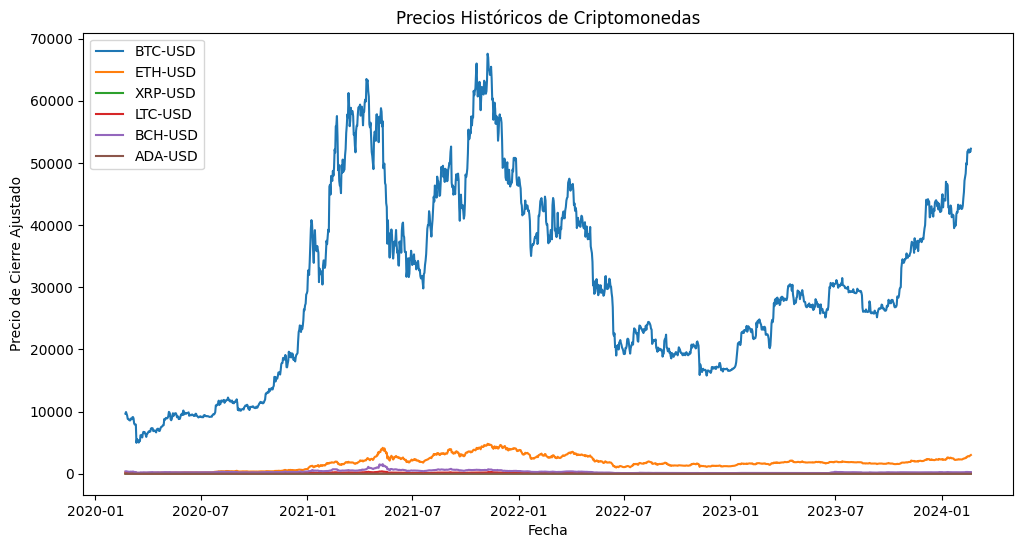

In [12]:
plt.figure(figsize=(12, 6))
for crypto in cryptos:
    plt.plot(data.index, data[crypto], label=crypto)
plt.title('Precios Históricos de Criptomonedas')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado')
plt.legend()
plt.show()

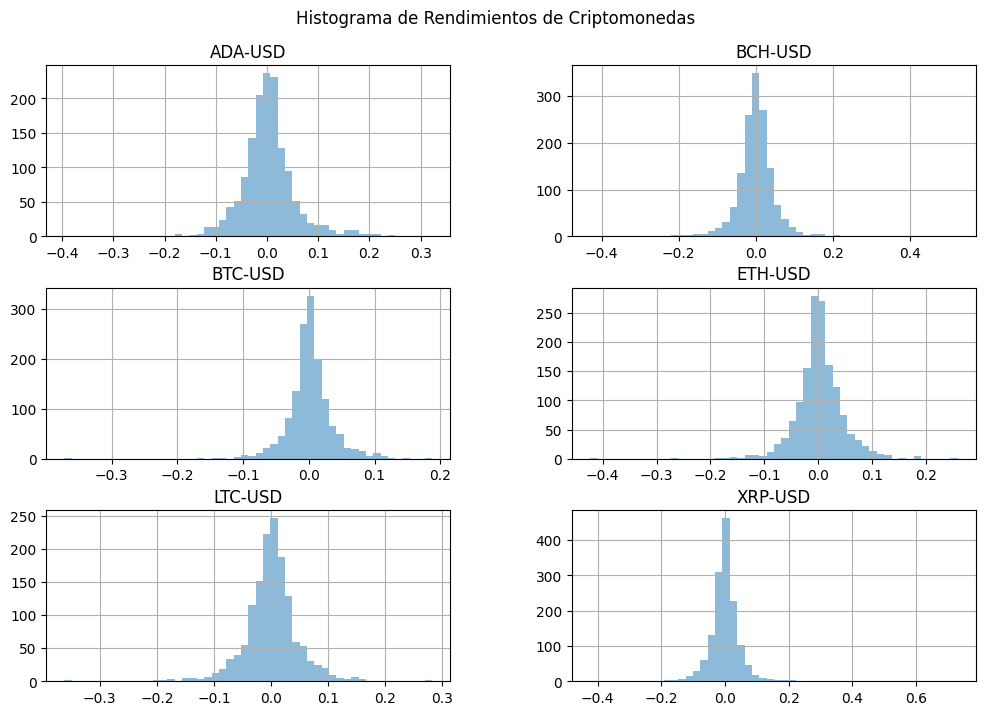

In [13]:
returns.hist(bins=50, figsize=(12, 8), alpha=0.5)
plt.suptitle('Histograma de Rendimientos de Criptomonedas', y=0.95)
plt.show()

## ML

In [14]:
# Creamos una columna target para cada criptomoneda ya que haremos una clasificacion binaria
for crypto in cryptos:
    returns[f'{crypto}_Target'] = (returns[crypto] > 0).astype(int)

In [15]:
returns

Ticker,ADA-USD,BCH-USD,BTC-USD,ETH-USD,LTC-USD,XRP-USD,BTC-USD_Target,ETH-USD_Target,XRP-USD_Target,LTC-USD_Target,BCH-USD_Target,ADA-USD_Target
Date,,,,,,,,,,,,
2020-02-23,0.054409,0.074371,0.027044,0.043542,0.058610,0.024683,1,1,1,1,1,1
2020-02-24,-0.041457,-0.059897,-0.027643,-0.031188,-0.050304,-0.042743,0,0,0,0,0,0
2020-02-25,-0.044030,-0.062507,-0.031965,-0.065602,-0.057660,-0.063611,0,0,0,0,0,0
2020-02-26,-0.122614,-0.105468,-0.055791,-0.089329,-0.142820,-0.089029,0,0,0,0,0,0
2020-02-27,0.004691,0.020975,-0.004085,0.004755,0.008090,0.027139,0,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-16,-0.015601,0.015348,0.004268,-0.007325,0.011541,0.003918,1,0,1,1,1,0
2024-02-17,0.015820,-0.026927,-0.009532,-0.006070,-0.008887,-0.026682,0,0,0,0,0,1
2024-02-18,0.017076,0.011205,0.008895,0.033131,0.010582,0.012761,1,1,1,1,1,1


In [16]:
# Revisamos si hay datos nulos
returns.isnull().sum()

Ticker
ADA-USD           0
BCH-USD           0
BTC-USD           0
ETH-USD           0
LTC-USD           0
XRP-USD           0
BTC-USD_Target    0
ETH-USD_Target    0
XRP-USD_Target    0
LTC-USD_Target    0
BCH-USD_Target    0
ADA-USD_Target    0
dtype: int64

In [17]:
# Dividimos los datos para tomar los de entrenamiento y los de prueba
X_train, X_test, y_train, y_test = train_test_split(returns.drop(columns=[f'{crypto}_Target' for crypto in cryptos]),
                                                    returns[[f'{crypto}_Target' for crypto in cryptos]],
                                                    test_size=0.2, random_state=42)

In [18]:
# Creamos el modelo de clasificacion (Random Forest) y lo entremos con los datos
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Realizamos las predicciones en el conjunto de prueba
predictions = model.predict(X_test)

In [20]:
# Evaluamos el rendimiento del modelo
accuracy = accuracy_score(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')

Accuracy: 0.99


In [21]:
print('Classification Report:')
print(classification_report(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       154
           1       1.00      1.00      1.00       162
           2       1.00      1.00      1.00       156
           3       1.00      1.00      1.00       151
           4       0.99      1.00      1.00       150
           5       1.00      1.00      1.00       156

   micro avg       1.00      1.00      1.00       929
   macro avg       1.00      1.00      1.00       929
weighted avg       1.00      1.00      1.00       929
 samples avg       0.78      0.78      0.78       929



c:\Users\Jorge HN\Desktop\Proyectos reales\Proyecto No Country DATA\s13-25-n-data-bi\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jorge HN\Desktop\Proyectos reales\Proyecto No Country DATA\s13-25-n-data-bi\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jorge HN\Desktop\Proyectos reales\Proyecto No Country DATA\s13-25-n-data-bi\env\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true 

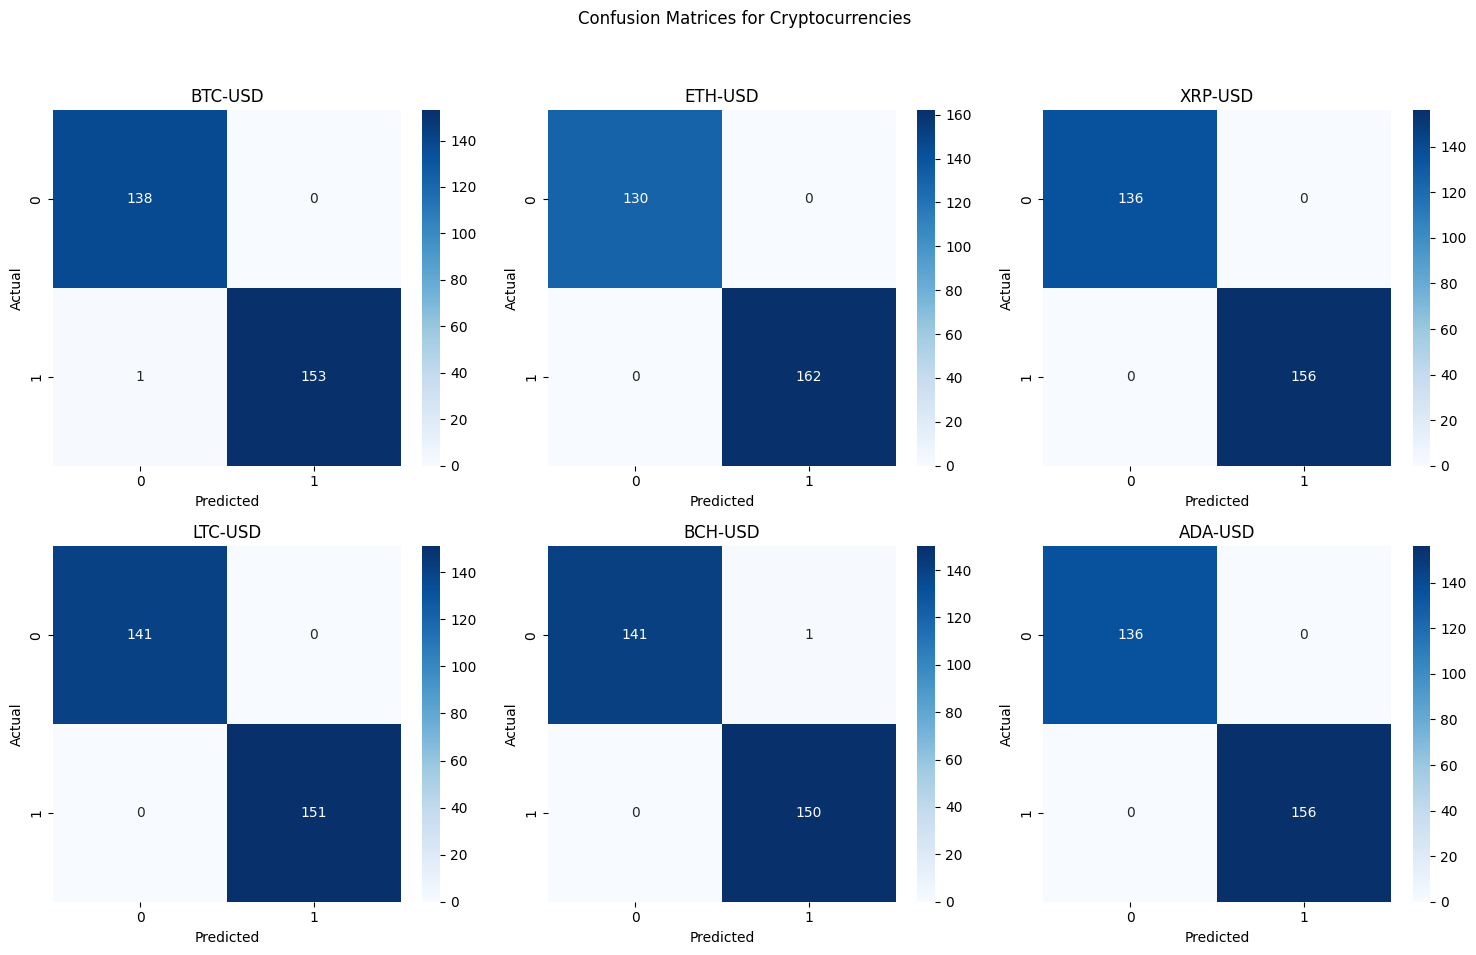

In [22]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Confusion Matrices for Cryptocurrencies')

# Iterar a través de las criptomonedas y dibujar las matrices de confusión
for i, crypto in enumerate(cryptos):
    conf_matrix = pd.crosstab(index=y_test[f'{crypto}_Target'], columns=predictions[:, i],
                              rownames=['Actual'], colnames=['Predicted'])

    # Obtener el índice correcto para el subgráfico
    row_index = i // 3
    col_index = i % 3

    # Dibujar la matriz de confusión en el subgráfico correspondiente
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=axes[row_index, col_index])
    axes[row_index, col_index].set_title(f'{crypto}')

# Ajustar el diseño y mostrar la figura
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [23]:
recommended_crypto = cryptos[model.feature_importances_.argmax()]
print(f'Recommended Cryptocurrency: {recommended_crypto}')

Recommended Cryptocurrency: LTC-USD


### PREDICCION SOBRE EL VALOR DE LAS CRYPTO

In [ ]:
from sklearn.linear_model import LinearRegression

cryptos = ['BTC-USD', 'ETH-USD', 'XRP-USD', 'LTC-USD', 'BCH-USD', 'ADA-USD']
end_date = datetime.now().strftime("%Y-%m-%d")

start_date = (datetime.now() - timedelta(days=4*365)).strftime("%Y-%m-%d")

data = yf.download(cryptos, start=start_date, end=end_date)["Adj Close"]

predictions_df = pd.DataFrame(index=pd.date_range(start='2024-01-01', end='2024-12-31', freq='D'))

for crypto in cryptos:
    X = np.arange(len(data[data.index.year == 2024])).reshape(-1, 1)
    y = data[data.index.year == 2024][crypto].values
    

    model = LinearRegression()
    model.fit(X, y)
    
    predicted_prices = model.predict(np.arange(len(predictions_df)).reshape(-1, 1))
    
    predictions_df[crypto] = predicted_prices



### GRAFICAMOS ESOS VALORES

In [ ]:
# Graficar las predicciones para el año 2024
plt.figure(figsize=(12, 6))
for crypto in cryptos:
    plt.plot(data[data.index.year == 2024].index, data[data.index.year == 2024][crypto], label=f'{crypto} Valor Real')
    plt.plot(predictions_df.index, predictions_df[crypto], linestyle='--', label=f'{crypto} Predicción')
plt.title('Predicciones de Criptomonedas para el Año 2024')
plt.xlabel('Fecha')
plt.ylabel('Precio de Cierre Ajustado')
plt.legend()
plt.show()
